In [1]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from load_data import load_skl_data, load_circular_data, load_two_spirals, load_random_classification_dataset
from vicinal_classification import mixup
from utilities import visclassifier

In [2]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_two_spirals(120)

In [3]:
from sklearn.svm import SVC

In [4]:
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(train_data, train_labels)
print(np.mean(svc.predict(train_data) == train_labels), np.mean(svc.predict(val_data) == val_labels), np.mean(svc.predict(test_data) == test_labels))

1.0 0.8333333333333334 0.75


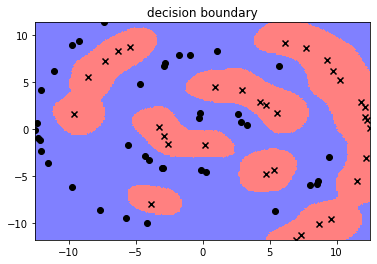

In [5]:
visclassifier(svc.predict, train_data, train_labels, 'decision boundary')

In [6]:
data_perturb, labels_perturb = mixup(train_data, train_labels, 0.2, 0.2, 1, 0, augment=False)

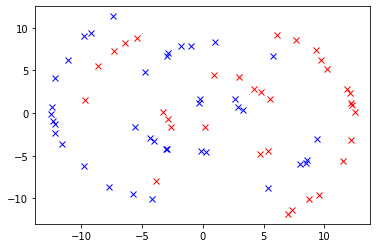

In [7]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.show()

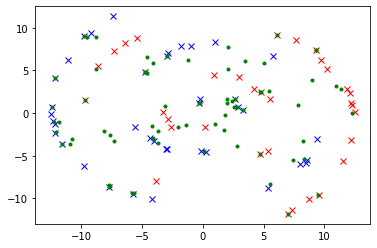

In [8]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.plot(data_perturb[:, 0], data_perturb[:, 1], 'g.')
plt.show()

In [9]:
labels_perturb

array([ 1.        ,  0.90379074, -1.        , -0.99844361, -1.        ,
        1.        ,  0.99333707, -1.        ,  1.        , -1.        ,
       -1.        , -1.        , -0.95404342, -1.        , -1.        ,
       -1.        , -1.        ,  1.        ,  0.74256003,  0.99916469,
       -0.99959063,  0.99999606, -1.        , -0.60400521, -1.        ,
       -1.        ,  1.        , -0.98820279, -1.        , -1.        ,
       -0.94352711,  1.        , -1.        ,  1.        ,  0.98858027,
        1.        ,  0.86373183,  0.98043531, -1.        , -1.        ,
       -0.81095419, -1.        , -0.76663785, -1.        ,  0.07567142,
       -1.        ,  1.        , -1.        , -1.        , -1.        ,
       -0.93744025, -0.01686181, -1.        , -0.99955234, -0.90372692,
       -0.99971158, -0.8564903 , -0.99999986, -0.94462567, -1.        ,
       -0.51121919,  1.        , -1.        , -1.        ,  1.        ,
       -0.99670166,  1.        ,  0.49627214, -0.97928551, -1.  

In [10]:
labels_perturb = np.sign(labels_perturb)

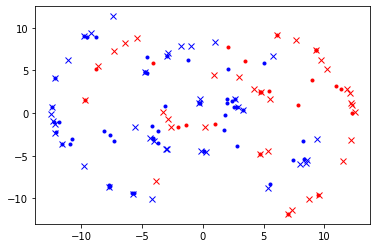

In [11]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.plot(data_perturb[labels_perturb == 1, 0], data_perturb[labels_perturb == 1, 1], 'r.')
plt.plot(data_perturb[labels_perturb == -1, 0], data_perturb[labels_perturb == -1, 1], 'b.')
plt.show()

In [12]:
svc_perturb = SVC(C=1.0, kernel='rbf', gamma='auto')
svc_perturb.fit(data_perturb, labels_perturb)
print(np.mean(svc_perturb.predict(data_perturb) == labels_perturb), np.mean(svc_perturb.predict(val_data) == val_labels), np.mean(svc_perturb.predict(test_data) == test_labels))

0.9722222222222222 0.5416666666666666 0.5416666666666666


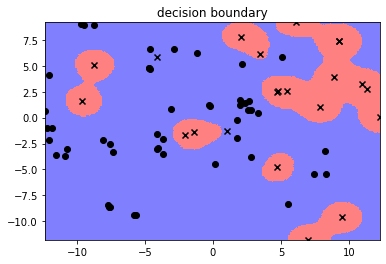

In [13]:
visclassifier(svc_perturb.predict, data_perturb, labels_perturb, 'decision boundary')

In [14]:
data_augment, labels_augment = mixup(train_data, train_labels, 0.2, 0.2, 1, 0, augment=True)

In [15]:
labels_augment

array([-1.        , -1.        , -1.        ,  1.        , -1.        ,
       -1.        ,  1.        ,  1.        , -1.        ,  1.        ,
       -0.95373288,  1.        , -1.        , -0.60841476, -1.        ,
        1.        ,  0.29796597,  1.        , -1.        , -0.75860532,
        1.        , -1.        ,  1.        , -1.        , -1.        ,
       -1.        ,  0.95905888,  1.        ,  1.        , -1.        ,
       -1.        ,  1.        ,  1.        ,  0.19143983, -1.        ,
       -0.9661932 , -0.96241489,  0.9527924 ,  1.        , -1.        ,
       -0.99869648,  1.        , -1.        , -1.        ,  1.        ,
       -1.        ,  1.        , -1.        , -1.        ,  1.        ,
        1.        ,  1.        ,  0.31850594,  1.        ,  1.        ,
       -1.        , -1.        ,  1.        , -1.        , -0.99998472,
       -1.        , -0.877019  , -1.        ,  1.        , -1.        ,
       -1.        ,  1.        ,  0.75922492, -1.        , -1.  

In [16]:
labels_augment = np.sign(labels_augment)

In [17]:
svc_augment = SVC(C=1.0, kernel='rbf', gamma='auto')
svc_augment.fit(data_augment, labels_augment)
print(np.mean(svc_augment.predict(data_augment) == labels_augment), np.mean(svc_augment.predict(val_data) == val_labels), np.mean(svc_augment.predict(test_data) == test_labels))

0.9861111111111112 0.7916666666666666 0.9166666666666666


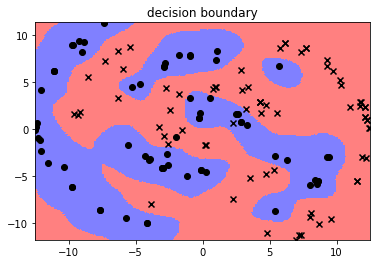

In [18]:
visclassifier(svc_augment.predict, data_augment, labels_augment, 'decision boundary')